### Lab 3 - Task 3.4

In [1]:
import tweepy
from tweepy import OAuthHandler

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)


In [2]:
from tweepy import Stream
from tweepy.streaming import StreamListener
 
class MyListener(StreamListener):
 
    def on_data(self, data):
        try:
            with open('hackerTweets2.json', 'a') as f:
                f.write(data)
                return True
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True
 
    def on_error(self, status):
        print(status)
        return True
 
twitter_stream = Stream(auth, MyListener())
twitter_stream.filter(track=['hacker'])

KeyboardInterrupt: 

Task 3.2: Analizing tweets - Counting terms

In [3]:
import json  
with open('hackerTweets2.json','r') as json_file:
         for line in json_file:
             tweet = json.loads(line)
             print tweet["text"]
            

Hacks were DHS IP addresses "NSA Director Uses "Russian Hacker Threat" To Gain Access To Voting Systems  https://t.co/68AVSc5mli
RT @SkyNews: A hacker who cracked into an NHS website says it took him less than an hour to get through the out-of-date security https://t.…
RT @Newsweek: Russian hacker says FBI offered him citizenship if he admitted to Clinton email hacks https://t.co/cDa67InmUb https://t.co/ol…
Ocurren ciertos ataques informáticos,"cyber atacks",que denotan perversión, psicosis,ocio y crueldad sin sentido del hacker.Malignos idiotas
RT @quigleyp: ELECTION FRAUD NEWS: Deep State Agencies Unlawfully Tampering In Free &amp; Fair Elections With Covert Surveillance Ops

https://…
Hacker. se uno de ellos (Spanish Edition https://t.co/gGuQLj9D5o #InfoSec #Cybersecurity https://t.co/kNojGaa4Sm
Hacker. se uno de ellos (Spanish Edition https://t.co/LrTJfSMweD #InfoSec #Cybersecurity https://t.co/ahMSx46n10
Hackers target city students; modus operandi exposed - Times of India https:/

In [4]:
 with open('hackerTweets2.json', 'r') as f:
    line = f.readline() 
    tweet = json.loads(line) 
    print(json.dumps(tweet, indent=4)) 

{
    "contributors": null, 
    "truncated": false, 
    "text": "Hacks were DHS IP addresses \"NSA Director Uses \"Russian Hacker Threat\" To Gain Access To Voting Systems  https://t.co/68AVSc5mli", 
    "is_quote_status": false, 
    "in_reply_to_status_id": null, 
    "id": 863738408203452417, 
    "favorite_count": 0, 
    "source": "<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</a>", 
    "retweeted": false, 
    "coordinates": null, 
    "timestamp_ms": "1494766258656", 
    "entities": {
        "user_mentions": [], 
        "symbols": [], 
        "hashtags": [], 
        "urls": [
            {
                "url": "https://t.co/68AVSc5mli", 
                "indices": [
                    105, 
                    128
                ], 
                "expanded_url": "http://www.zerohedge.com/news/2017-05-13/nsa-director-uses-russian-hacker-threat-gain-access-voting-systems", 
                "display_url": "zerohedge.com/news/2017-05-1\u2026"
     

In [5]:
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

with open('hackerTweets2.json', 'r') as f:
#import io
#f=io.open('data/stream_barcelona.json', 'r', encoding='utf8' )

     for line in f:
        tweet = json.loads(line)
        tokens = preprocess(tweet['text'])
        print(tokens)

[u'Hacks', u'were', u'DHS', u'IP', u'addresses', u'"', u'NSA', u'Director', u'Uses', u'"', u'Russian', u'Hacker', u'Threat', u'"', u'To', u'Gain', u'Access', u'To', u'Voting', u'Systems', u'https://t.co/68AVSc5mli']
[u'RT', u'@SkyNews', u':', u'A', u'hacker', u'who', u'cracked', u'into', u'an', u'NHS', u'website', u'says', u'it', u'took', u'him', u'less', u'than', u'an', u'hour', u'to', u'get', u'through', u'the', u'out-of-date', u'security', u'https://t.', u'\u2026']
[u'RT', u'@Newsweek', u':', u'Russian', u'hacker', u'says', u'FBI', u'offered', u'him', u'citizenship', u'if', u'he', u'admitted', u'to', u'Clinton', u'email', u'hacks', u'https://t.co/cDa67InmUb', u'https://t.co/ol', u'\u2026']
[u'Ocurren', u'ciertos', u'ataques', u'inform', u'\xe1', u'ticos', u',', u'"', u'cyber', u'atacks', u'"', u',', u'que', u'denotan', u'perversi', u'\xf3', u'n', u',', u'psicosis', u',', u'ocio', u'y', u'crueldad', u'sin', u'sentido', u'del', u'hacker', u'.', u'Malignos', u'idiotas']
[u'RT', u'@quig

In [6]:
import operator 
import json
from collections import Counter

fname = 'hackerTweets2.json'
with open(fname, 'r') as f:
   count_all = Counter()
   for line in f:
       tweet = json.loads(line)
       # Create a list with all the terms
       terms_all = [term for term in preprocess(tweet['text'])]
       # Update the counter
       count_all.update(terms_all)
   print(count_all.most_common(5))


[(u'.', 37), (u':', 33), (u'hacker', 24), (u'\u2026', 23), (u'RT', 22)]


In [7]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords") # download the stopword corpus on our computer
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via', 'RT']
from collections import Counter


[nltk_data] Downloading package stopwords to /Users/sunce/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import operator 
import json
from collections import Counter
 
fname = 'hackerTweets2.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]
        count_all.update(terms_stop)
    for word, index in count_all.most_common(5):
        print '%s : %s' % (word, index)

hacker : 24
… : 23
Hacker : 19
I : 13
To : 11


In [9]:
import operator 
import json
from collections import Counter
 
fname = 'hackerTweets2.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_stop = [term for term in preprocess(tweet['text']) if term not in stop]
        terms_hash = [term for term in preprocess(tweet['text']) 
              if term.startswith('#')]
        count_all.update(terms_hash)
    for word, index in count_all.most_common(5):
        print '%s : %s' % (word, index)


#HB : 6
#InfoSec : 2
# : 2
#cybersecurity : 2
#hacker : 2


In [10]:
import operator 
import json
from collections import Counter
 
fname = 'hackerTweets2.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_only = [term for term in preprocess(tweet['text']) 
              if term not in stop and
              not term.startswith(('#', '@'))] 
        count_all.update(terms_hash)
    for word, index in count_all.most_common(5):
        print '%s : %s' % (word, index)


#CIA : 65
#porn : 65
#hacker : 65
#cybersecurity : 65
#Tor : 65


### Task 3.3: Case study

In [12]:
import operator 
import json
from collections import Counter
 
fname = 'hackerTweets2.json'
with open(fname, 'r') as f:
    count_all = Counter()
    for line in f:
        tweet = json.loads(line)
        # Create a list with all the terms
        terms_hash = [term for term in preprocess(tweet['text']) if term.startswith('#') and term not in stop]        
        count_all.update(terms_hash)
# Print the first 10 most frequent words
print(count_all.most_common(15))

[(u'#HB', 6), (u'#InfoSec', 2), (u'#cybersecurity', 2), (u'#hacker', 2), (u'#Cybersecurity', 2), (u'#MAGA', 1), (u'#INFO', 1), (u'#OneWorld', 1), (u'#nhscyberattack', 1), (u'#CIA', 1), (u'#porn', 1), (u'#01', 1), (u'#marketing', 1), (u'#BOOKSPECIALS', 1), (u'#news', 1)]


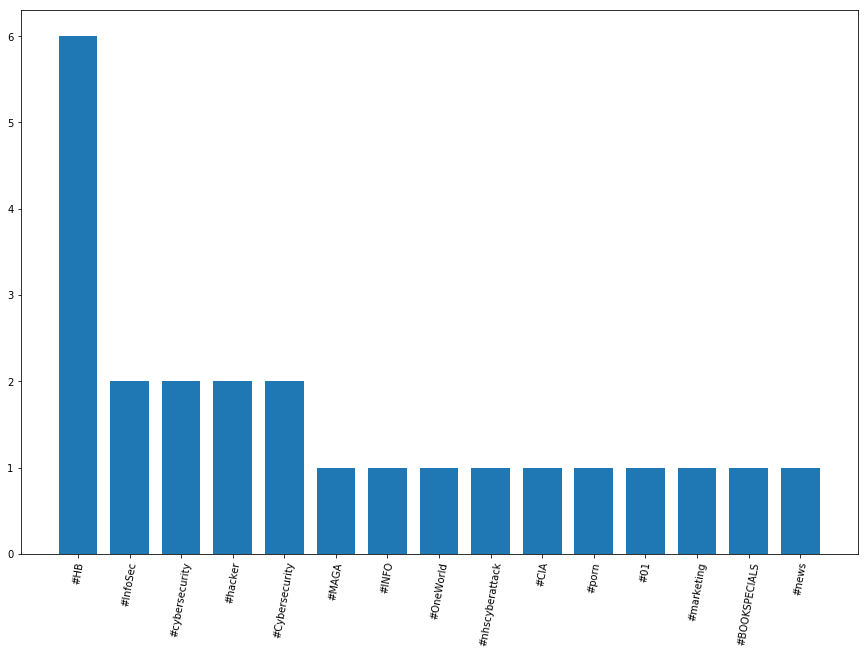

In [13]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,10)
import matplotlib.pyplot as plt

sorted_x, sorted_y = zip(*count_all.most_common(15))
#print(sorted_x, sorted_y)

plt.bar(range(len(sorted_x)), sorted_y, width=0.75, align='center');
plt.xticks(range(len(sorted_x)), sorted_x, rotation=80);
plt.axis('tight'); 